In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_excel('Marketwine.xlsx',sheet_name='Sheet1')
print(wine_df.shape)
print(wine_df.columns)

(41731, 65)
Index(['title', 'points', 'badge', 'price_usd', 'vintage_year',
       'alcohol_content', 'bottle_size', 'wine_style', 'grape_variety',
       'designation', 'vineyard_state', 'vineyard_region_1',
       'vineyard_region_2', 'winery', 'winery_longitude', 'winery_latitude',
       'winery_state', 'review_url', 'review_year', 'taster_name', 'natural*',
       'organic*', 'cherr*', 'sweet*', 'tanni*', 'earth*', 'fresh*', 'melon',
       'yeast', 'tart', 'bright*', 'jam', 'plum*', 'perfume*', 'fruit*',
       'toast*', 'dry*', 'crisp*', 'acid*', 'vanilla', 'apple', 'lime', 'oak*',
       'spic*', 'strawberr*', 'tropical*', 'smok*', 'meat*', 'berr*',
       'mineral', 'apricot', 'tobacco', 'leather*', 'forest', 'pepper*',
       'herb*', 'floral', 'rich*', 'citrus*', 'nut*', 'grass*', 'lemon*',
       'cream*', 'wood*', 'honey'],
      dtype='object')


In [3]:
wine_df.columns = wine_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('*', '')

# Display cleaned columns
print("\nCleaned column names:")
print(wine_df.columns)


Cleaned column names:
Index(['title', 'points', 'badge', 'price_usd', 'vintage_year',
       'alcohol_content', 'bottle_size', 'wine_style', 'grape_variety',
       'designation', 'vineyard_state', 'vineyard_region_1',
       'vineyard_region_2', 'winery', 'winery_longitude', 'winery_latitude',
       'winery_state', 'review_url', 'review_year', 'taster_name', 'natural',
       'organic', 'cherr', 'sweet', 'tanni', 'earth', 'fresh', 'melon',
       'yeast', 'tart', 'bright', 'jam', 'plum', 'perfume', 'fruit', 'toast',
       'dry', 'crisp', 'acid', 'vanilla', 'apple', 'lime', 'oak', 'spic',
       'strawberr', 'tropical', 'smok', 'meat', 'berr', 'mineral', 'apricot',
       'tobacco', 'leather', 'forest', 'pepper', 'herb', 'floral', 'rich',
       'citrus', 'nut', 'grass', 'lemon', 'cream', 'wood', 'honey'],
      dtype='object')


a. Reviewing the wine trends locally in Charlottesville and globally, what would customers be open to trying?

In [4]:
# Wine similar to burgundy
burgundy_wine = wine_df[
    (wine_df['grape_variety'].str.lower() == 'pinot noir') &   # Grape variety is Pinot Noir
    (wine_df['cherr'] == 1) &                                  # Cherry characteristic
    (wine_df['vanilla'] == 1) &                                # Vanilla characteristic
    (wine_df['leather'] == 1)                                  # Leather characteristic
]

# Display the filtered Burgundy wine data
print(burgundy_wine)
print(burgundy_wine['winery_state'])

                                                   title  points badge  \
1330   J Vineyards & Winery 2013 Bow Tie Vineyard Est...      90   NaN   
12294  Lynmar 2016 Monastery Pinot Noir (Russian Rive...      95   NaN   

       price_usd  vintage_year  alcohol_content bottle_size wine_style  \
1330        65.0        2013.0            0.146      750 ml        Red   
12294       70.0        2016.0            0.142      750 ml        Red   

      grape_variety                    designation  ... herb floral rich  \
1330     Pinot Noir  Bow Tie Vineyard Estate Grown  ...    0      0    0   
12294    Pinot Noir                      Monastery  ...    0      0    0   

      citrus  nut  grass lemon cream  wood honey  
1330       0    0      0     0     0     0     0  
12294      0    0      0     0     0     0     0  

[2 rows x 65 columns]
1330     California
12294    California
Name: winery_state, dtype: object


In [5]:
# Filter for Bordeaux-style Red Blend wines with a non-null 'badge'
bordeaux_red_blend_df = wine_df[
    (wine_df['grape_variety'] == 'Bordeaux-style Red Blend') &  # Filter by grape variety
    (wine_df['badge'].notna())                                  # Badge column is not null
]

# Sort by 'points' in descending order and select the top 10
top_10_bordeaux = bordeaux_red_blend_df.sort_values(by='points', ascending=False).head(10)

# Display the top 10 wines
print(top_10_bordeaux)
print(f"Number of Bordeaux wines in top 10 by points: {top_10_bordeaux.shape[0]}")

                                                   title  points  \
39540                    Quintessa 2019 Red (Rutherford)     100   
37127  Joseph Phelps 2018 Insignia Estate Grown Red (...      98   
1677   Joseph Phelps 2013 Insignia 40th Vintage Estat...      98   
24156      Realm Cellars 2016 Falstaff Red (Napa Valley)      98   
24216  Joseph Phelps 2016 Insignia Estate Grown Red (...      98   
19841  Joseph Phelps 2015 Insignia Estate Grown Red (...      97   
16240  Anderson Conn Valley 2015 Aurum Red (Napa Valley)      97   
29259  Crown Point 2016 Estate Selection Red (Happy C...      97   
28843  Leonetti Cellar 2017 Loess Red (Walla Walla Va...      96   
36825  Leonetti Cellar 2018 Reserve Red (Walla Walla ...      96   

                  badge  price_usd  vintage_year  alcohol_content bottle_size  \
39540  Cellar Selection      230.0        2019.0            0.145      750 ml   
37127  Cellar Selection      315.0        2018.0            0.145      750 ml   
1677    

In [6]:
# Filter for wines where 'grape_variety' is 'Champagne Blend'
champagne_blend_df = wine_df[wine_df['grape_variety'] == 'Champagne Blend']

# Display the filtered rows
print(champagne_blend_df)
print(f"Number of Champagne Blend wines: {champagne_blend_df.shape[0]}")

                                                   title  points  \
4789   Sparkling Pointe NV Topaz Impérial Rosé  (Nort...      90   
5058   Château Frank 2009 Brut Methode Champanoise Es...      88   
5068   Château Frank 2009 Blanc de Noirs Methode Cham...      88   
5088   Sparkling Pointe 2006 Brut Séduction  (North F...      90   
9224   Hermann J. Wiemer 2009 Blanc de Blanc  (Seneca...      93   
9575             Trump 2010 Sparkling Rosé  (Monticello)      86   
10666  Sparkling Pointe 2014 Topaz Impérial Rosé  (No...      91   
10667  Sparkling Pointe 2014 Brut  (North Fork of Lon...      90   
14825  Sparkling Pointe 2015 Brut  (North Fork of Lon...      88   
14826  Sparkling Pointe 2015 Topaz Impérial Rosé  (No...      90   
17577  Sparkling Pointe 2014 Noir de Noirs  (North Fo...      86   
17927  Sparkling Pointe 2013 Séduction Blanc de Noirs...      86   
17928  Sparkling Pointe 2013 Séduction Blanc de Blanc...      91   
18225  Hermann J. Wiemer 2013 Blanc de Blanc Est

In [7]:
# Filter for brunello wines with specific characteristics
characteristic_wines = wine_df[
    (wine_df['cherr'] == 1) &  # Cherry characteristic
    (wine_df['dry'] == 1) &    # Dry characteristic
    (wine_df['oak'] == 1) &    # Oak characteristic
    (wine_df['berr'] == 1) &   # Berry characteristic
    (wine_df['wood'] == 1)     # Wood characteristic
]

# Display the filtered data
print(characteristic_wines)
print(f"Number of wines with specified characteristics: {characteristic_wines.shape[0]}")

                                                   title  points badge  \
14476          Snowy Peaks 2016 Élevé Red (Grand Valley)      85   NaN   
17201  Oak Mountain 2014 Estate Merlot (Temecula Valley)      86   NaN   
35260  Midnight 2018 Nebula Cabernet Sauvignon (Paso ...      87   NaN   
35682  Odonata 2016 Brunello di Machado Machado Creek...      88   NaN   
36943  Bellante 2018 Figlio e Nuora La Encantada Vine...      91   NaN   

       price_usd  vintage_year  alcohol_content bottle_size wine_style  \
14476       24.0        2016.0            0.139      750 ml        Red   
17201       30.0        2014.0            0.147      750 ml        Red   
35260       55.0        2018.0            0.151      750 ml        Red   
35682       65.0        2016.0            0.142      750 ml        Red   
36943       65.0        2018.0            0.149      750 ml        Red   

            grape_variety                                 designation  ...  \
14476          Red Blends       

In [8]:
# filter for Rhone wine
# Filter the DataFrame for Rhone wines with specified characteristics
rhone_wines = wine_df[(wine_df['cherr'] == 1) & (wine_df['dry'] == 1) & (wine_df['crisp'] == 1) & (wine_df['acid'] == 1)]
top_10_rhone = rhone_wines.sort_values(by='points', ascending=False).head(10)
# Display the filtered DataFrame 
print (rhone_wines)
print (top_10_rhone)

                                                   title  points  \
865    Heron Hill 2013 Ingle Vineyard Cabernet Franc ...      89   
1408   Cristom 2013 Louise Vineyard Pinot Noir (Eola-...      94   
4312   Inspire Moore 2013 Lust Pinot Noir (Finger Lakes)      90   
5383   Hazlitt 1852 Vineyards 2012 Cabernet Franc (Fi...      90   
7776          Raphael 2016 Rosé of Pinot Noir (New York)      88   
8792             Keuka Spring 2015 Merlot (Finger Lakes)      91   
8793   Chateau Lafayette Reneau 2016 Pinot Noir Rosé ...      89   
8831           Fulkerson 2016 Estate Rosé (Finger Lakes)      87   
8887   Sherwood House Vineyards 2016 Oregon Road Whit...      87   
8928    Stone Tower 2013 Hogback Mountain Red (Virginia)      91   
9102   Peter Paul Wines 2015 Live Free or Die Pinot N...      90   
10631  Hudson-Chatham 2014 Casscles Vineyards Chelois...      87   
10715  Anthony Nappa 2014 Shared Table Farm Pinot Noi...      91   
12532  King Estate 2015 Bradshaw Pinot Noir (Wil

In [9]:
#filter for barolo wine
# Filter the DataFrame for Barolo wines with specified characteristics 
barolo_wines = wine_df[(wine_df['cherr'] == 1) & (wine_df['berr'] == 1) & (wine_df['tobacco'] == 1)] 
top_10_barolo = barolo_wines.sort_values(by='points', ascending=False).head(10)
# Display the filtered DataFrame print(barolo_wines)
print(barolo_wines)
print(top_10_barolo)

                                                   title  points  \
4331   Santa Cruz Mountain Vineyard 2013 Luchessi Vin...      93   
6312   Belden Barns 2014 Estate Grown Syrah (Sonoma M...      91   
6351   Limerick Lane 2015 Hail Mary Syrah-Grenache (R...      91   
6608   Rocky Point 2013 La Colina Vineyard Pinot Noir...      89   
8743   WillaKenzie Estate 2014 Kiana Pinot Noir (Yamh...      92   
9225     Shaw 2009 Keuka Hill Reserve Red (Finger Lakes)      89   
10221                Fox Run 2012 Meritage (Seneca Lake)      90   
10656  Hudson-Chatham 2014 River's Edge Casscles Vine...      85   
12479  Left Coast 2015 Truffle Hill Estate Pinot Noir...      90   
15870   Joullian 2014 Cabernet Sauvignon (Carmel Valley)      90   
19522  Martin Ranch 2015 Therese Vineyards Signature ...      87   
19922  The Winery At Holy Cross Abbey 2016 Reserve Ca...      89   
19981  Shady Lane 2016 Estate Grown Cabernet Franc (L...      88   
20031  Jefferson Vineyards 2016 Jefferson's Own 

In [10]:
# now we get data of millennials considering 

# Filter the data based on the specified conditions
filtered_wines = wine_df[
    (wine_df['natural'] == 1) &        # Natural characteristic
    (wine_df['price_usd'] < 20) &      # Price less than 20 USD
    (wine_df['wine_style'] == 'Rose')  # Wine style is Rose
]

# Display the filtered data
print(filtered_wines)
print(f"Number of wines that meet the criteria: {filtered_wines.shape[0]}")

                                                   title  points  \
21528  Quady North 2018 Rosé of Counoise (Applegate V...      91   
39708            2Hawk 2020 Grenache Rosé (Rogue Valley)      91   

                 badge  price_usd  vintage_year  alcohol_content bottle_size  \
21528              NaN       19.0        2018.0            0.126      750 ml   
39708  Editors' Choice       18.0        2020.0            0.127      750 ml   

      wine_style grape_variety designation  ... herb floral rich citrus  nut  \
21528       Rose      Counoise     Rosé of  ...    1      0    0      0    0   
39708       Rose          Rosé    Grenache  ...    0      0    0      0    0   

       grass lemon cream  wood honey  
21528      0     0     0     0     0  
39708      0     0     0     0     0  

[2 rows x 65 columns]
Number of wines that meet the criteria: 2


In [11]:
# Another Wine preference by Millennials 
filtered_wines1 = wine_df[
    (wine_df['organic'] == 1) &
    (wine_df['price_usd'] < 20) &
    (wine_df['wine_style'] == 'Rose') 
]

#print the data
print(filtered_wines1)
print(f"Total count: {filtered_wines1.shape[0]}")

                                                   title  points badge  \
39930  Carol Shelton 2021 Wild Thing Rendezvous Dry R...      89   NaN   

       price_usd  vintage_year  alcohol_content bottle_size wine_style  \
39930       19.0        2021.0            0.135      750 ml       Rose   

      grape_variety                designation  ... herb floral rich citrus  \
39930          Rosé  Wild Thing Rendezvous Dry  ...    0      0    0      0   

       nut  grass lemon cream  wood honey  
39930    0      0     0     0     0     0  

[1 rows x 65 columns]
Total count: 1


In [12]:
# we get data of millennials considering alternatives

# Filter the data based on the specified conditions
filtered_wines2 = wine_df[
    (wine_df['natural'] == 1) &        # Natural characteristic
    (wine_df['wine_style'] == 'Sparkling')  # Wine style is Rose
]

# Display the filtered data
print(filtered_wines2)
print(f"Number of wines that meet the criteria: {filtered_wines2.shape[0]}")
filtered_wines2

                                                   title  points badge  \
26690  Left Coast 2018 Queen Bee Bubbly Sparkling Pin...      88   NaN   

       price_usd  vintage_year  alcohol_content bottle_size wine_style  \
26690       36.0        2018.0            0.115      750 ml  Sparkling   

      grape_variety                 designation  ... herb floral rich citrus  \
26690    Pinot Noir  Queen Bee Bubbly Sparkling  ...    0      0    0      1   

       nut  grass lemon cream  wood honey  
26690    0      0     0     0     0     1  

[1 rows x 65 columns]
Number of wines that meet the criteria: 1


,title,points,badge,price_usd,vintage_year,alcohol_content,bottle_size,wine_style,grape_variety,designation,...,herb,floral,rich,citrus,nut,grass,lemon,cream,wood,honey
26690,Left Coast 2018 Queen Bee Bubbly Sparkling Pin...,88,NaN,36.0,2018.0,0.115,750 ml,Sparkling,Pinot Noir,Queen Bee Bubbly Sparkling,...,0,0,0,1,0,0,0,0,0,1


b. Are there wine-producing regions more easily available in the US that wine drinkers might be interested in?

Unique states in the dataset (potential U.S. states):
['Illinois' 'California' 'New York' 'Missouri' 'North Carolina'
 'Pennsylvania' 'New Jersey' 'Virginia' 'Michigan' 'Tennessee' 'Ohio'
 'Florida' 'Georgia' 'Alabama' 'Washington' 'Oregon' 'Massachusetts'
 'Rhode Island' 'Indiana' 'Arizona' 'Texas' 'Nebraska' 'Colorado' 'Idaho'
 'Minnesota' 'Wisconsin' 'Kansas' 'New Hampshire' 'Iowa' 'New Mexico'
 'Oklahoma' 'South Carolina' 'West Virginia' 'Mississippi' 'Kentucky'
 'Maryland' 'Vermont' 'Maine']

Summary of wine-producing regions in the U.S. by characteristic:
                Natural  Organic    Rose  Sparkling   Total
winery_state                                               
California         31.0    153.0  1094.0      479.0  1757.0
Oregon             67.0     19.0   213.0      137.0   436.0
New York            2.0      1.0   209.0      124.0   336.0
Washington          0.0      5.0   193.0       27.0   225.0
Virginia            0.0      0.0    33.0        9.0    42.0
Michigan    

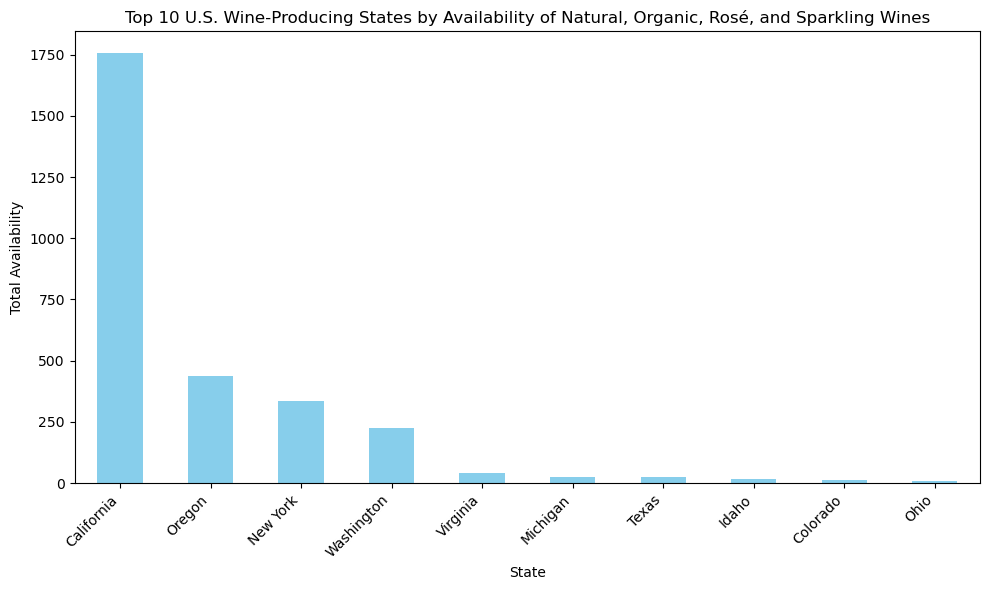

In [13]:
# Step 1: Identify all unique states listed in the 'winery_state' column
unique_states_in_us = wine_df['winery_state'].dropna().unique()
print("Unique states in the dataset (potential U.S. states):")
print(unique_states_in_us)

# Step 2: Define function to filter wines by characteristic and count by state
def filter_and_count_by_state(df, characteristic, column):
    if column == 'wine_style':
        filtered_wines = df[df['wine_style'].str.contains(characteristic, case=False, na=False)]
    else:
        filtered_wines = df[df[column] == 1]
    
    # Count wines by state
    state_counts = filtered_wines['winery_state'].value_counts()
    return state_counts

# Step 3: Collect counts for each characteristic
natural_counts = filter_and_count_by_state(wine_df, 'natural', 'natural')
organic_counts = filter_and_count_by_state(wine_df, 'organic', 'organic')
rose_counts = filter_and_count_by_state(wine_df, 'Rose', 'wine_style')
sparkling_counts = filter_and_count_by_state(wine_df, 'Sparkling', 'wine_style')

# Step 4: Combine results into a summary DataFrame
summary_df = pd.DataFrame({
    'Natural': natural_counts,
    'Organic': organic_counts,
    'Rose': rose_counts,
    'Sparkling': sparkling_counts
}).fillna(0)

# Calculate a total score for each state (sum of all characteristics)
summary_df['Total'] = summary_df.sum(axis=1)

# Sort the DataFrame by total availability
summary_df = summary_df.sort_values(by='Total', ascending=False)

# Display the summary results
print("\nSummary of wine-producing regions in the U.S. by characteristic:")
print(summary_df)

# Optional: Plot the top states based on total availability
import matplotlib.pyplot as plt

# Plot the top 10 states by total score
top_states = summary_df.head(10)
top_states['Total'].plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 U.S. Wine-Producing States by Availability of Natural, Organic, Rosé, and Sparkling Wines')
plt.xlabel('State')
plt.ylabel('Total Availability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

c. Could they find good ones at the popular price point of under $20?

In [14]:
# Filter for wines priced below $20
wine_below_20_df = wine_df[wine_df['price_usd'] < 20]

# Calculate the average price of wines in this filtered DataFrame
avg_price_below_20 = wine_below_20_df['price_usd'].mean()

print(f"Average price of wines priced below $20: ${avg_price_below_20:.2f}")


Average price of wines priced below $20: $15.62


In [15]:
# Filter for wines with points above 92 and non-null label
filtered_wines = wine_below_20_df[
    (wine_below_20_df['points'] > 92) & 
    (wine_below_20_df['badge'].notnull())
]

# Display the filtered DataFrame
print(filtered_wines)

# Display the count of the filtered values
count_filtered_wines = filtered_wines.shape[0]  # Number of rows in the filtered DataFrame
print(f"\nCount of wines with points above 92 and non-null label: {count_filtered_wines}")


                                                   title  points  \
5722   Bodkin 2015 Hotspur Rosé of Syrah (Russian Riv...      93   
10101  Gainey 2014 Limited Selection Sauvignon Blanc ...      93   
12594  Pedroncelli 2015 Mother Clone Zinfandel (Dry C...      93   
27043        Firesteed 2019 Riesling (Willamette Valley)      93   
28929       Tensley 2017 Fundamental Red (Central Coast)      93   
30829              Dusty Nabor 2017 NSO Red (California)      93   
32217  St. Amant 2019 The Road Less Traveled Temprani...      93   
32228   St. Amant 2019 Tools Of The Trade Barbera (Lodi)      93   
35887  Michael David 2018 Petite Petit Petite Sirah (...      93   
40171  Matchbook 2020 Red Gravel Estate Bottled Caber...      93   
40173  Matchbook 2020 Estate Bottled Petite Sirah (Du...      93   
40369  Allan Hancock 2020 Pinot Noir (Santa Barbara C...      93   
40370  Allan Hancock 2020 Albariño (Santa Barbara Cou...      93   
41664  Matchbook 2019 Estate Bottled Malbec (Dun

In [16]:
# Filter for wines with points above 90 and non-null label and designation 
filtered_wines_b20_b_d = wine_below_20_df[
    (wine_below_20_df['points'] > 92) & 
    (wine_below_20_df['badge'].notnull()) & (wine_below_20_df['designation'].notnull())
]

# Display the filtered DataFrame
print(filtered_wines_b20_b_d)

# Display the count of the filtered values
count_filtered_wines_good = filtered_wines_b20_b_d.shape[0]  # Number of rows in the filtered DataFrame
print(f"\nCount of wines with points above 92 and non-null label and designation: {count_filtered_wines_good}")


                                                   title  points  \
5722   Bodkin 2015 Hotspur Rosé of Syrah (Russian Riv...      93   
10101  Gainey 2014 Limited Selection Sauvignon Blanc ...      93   
12594  Pedroncelli 2015 Mother Clone Zinfandel (Dry C...      93   
28929       Tensley 2017 Fundamental Red (Central Coast)      93   
30829              Dusty Nabor 2017 NSO Red (California)      93   
32217  St. Amant 2019 The Road Less Traveled Temprani...      93   
32228   St. Amant 2019 Tools Of The Trade Barbera (Lodi)      93   
35887  Michael David 2018 Petite Petit Petite Sirah (...      93   
40171  Matchbook 2020 Red Gravel Estate Bottled Caber...      93   
40173  Matchbook 2020 Estate Bottled Petite Sirah (Du...      93   
41664  Matchbook 2019 Estate Bottled Malbec (Dunnigan...      93   
41666  Matchbook 2019 Tinto Rey Tempranillo (Dunnigan...      94   

                 badge  price_usd  vintage_year  alcohol_content bottle_size  \
5722   Editors' Choice       19.0  

d. Are there any specific wines, wine styles, or vineyard regions they should consider?

The COVID-19 pandemic led to significant supply chain disruptions, creating an opportunity for wines from lesser-known regions to fill the void left by traditional European and Californian wines. Notable regions that gained attention during this time include Washington, Oregon, and New York, particularly the Finger Lakes region. Additionally, there was a growing interest in wines from Idaho, Colorado, Ohio, and Virginia. This shift allowed local wines to gain traction in the market. Selecting the states which are  and sorting the vineyard_region1 and vineyard_region2 as pairs. Displaying the most popular vineyard regions by states(Washington, Oregon, New York, Idaho, Colorado, Ohio and Virginia ) which market street wines customers might be interested in.

In [17]:
# Filter rows where wine_style is 'Rose' and 'dry', 'fruit', and 'mineral' columns have a value of 1
filtered_df = wine_df[
    (wine_df['wine_style'] == 'Rose') &
    (wine_df['dry'] == 1) &
    (wine_df['fruit'] == 1) &
    (wine_df['mineral'] == 1)
]

# Select and display only the desired columns
filtered_columns = filtered_df[['title', 'dry', 'fruit', 'mineral', 'wine_style']]
print(filtered_columns)

                                                   title  dry  fruit  mineral  \
7336    Efeste 2016 Oldfield Estate Rosé (Yakima Valley)    1      1        1   
8804   Wagner 2016 Rosé of Cabernet Franc (Finger Lakes)    1      1        1   
18015  Big Table Farm 2017 Laughing Pig Pinot Noir Ro...    1      1        1   
18735  Andrew Murray 2017 Espérance Curtis Vineyard R...    1      1        1   
20773    Picayune 2018 Hay Penny Rosé (Mendocino County)    1      1        1   

      wine_style  
7336        Rose  
8804        Rose  
18015       Rose  
18735       Rose  
20773       Rose  


In [18]:
# Display unique entries and their counts in the 'wine_style' column
unique_styles_all_bc= wine_df['wine_style'].value_counts()
print(unique_styles_all_bc)

wine_style
Red            27890
White          10890
Rose            1821
Sparkling        827
Dessert          249
Fortified         30
Port/Sherry       24
Name: count, dtype: int64


In [19]:
# Count the number of wines from each winery_state
winery_state_counts = wine_df['winery_state'].value_counts()

# Display the counts
print("Number of wines from each winery_state:")
print(winery_state_counts)


Number of wines from each winery_state:
winery_state
California        26876
Oregon             5489
Washington         4969
New York           2030
Virginia            495
Texas               277
Colorado            258
Idaho               229
Michigan            178
Pennsylvania        137
Tennessee           115
Missouri             96
New Jersey           84
Ohio                 70
Illinois             69
Massachusetts        68
North Carolina       36
Minnesota            34
Alabama              26
Arizona              25
Indiana              20
Florida              18
Nebraska             18
New Mexico           16
Iowa                 13
Georgia              12
Kansas               12
New Hampshire        12
Wisconsin            10
West Virginia         8
Oklahoma              7
Kentucky              7
Rhode Island          5
Vermont               5
Maryland              3
South Carolina        2
Mississippi           1
Maine                 1
Name: count, dtype: int64


In [20]:
# Filter for rows where winery_state is 'Washington'
washington_wines = wine_df[wine_df['winery_state'] == 'Washington']

# Get the count of each wine style, sorted in descending order
washington_wine_styles = washington_wines['wine_style'].value_counts().sort_index()

# Display the sorted wine styles
print("Different wine styles produced in Washington:")
print(washington_wine_styles)


Different wine styles produced in Washington:
wine_style
Dessert          16
Fortified         4
Port/Sherry       2
Red            3836
Rose            193
Sparkling        27
White           891
Name: count, dtype: int64


In [21]:
# Filter for Washington wines in the original DataFrame
washington_wine_df = wine_df[wine_df['winery_state'] == 'Washington']

# Group by winery_state, vineyard_region_1, vineyard_region_2, and wine_style, then count occurrences
washington_wine_style_counts = (
    washington_wine_df
    .groupby(['winery_state', 'vineyard_region_1', 'vineyard_region_2', 'wine_style'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Display the result
print(washington_wine_style_counts)

    winery_state        vineyard_region_1 vineyard_region_2 wine_style  count
23    Washington     Columbia Valley (WA)   Columbia Valley        Red   1394
101   Washington  Walla Walla Valley (WA)   Columbia Valley        Red    719
65    Washington             Red Mountain   Columbia Valley        Red    563
115   Washington            Yakima Valley   Columbia Valley        Red    489
26    Washington     Columbia Valley (WA)   Columbia Valley      White    365
..           ...                      ...               ...        ...    ...
88    Washington      Stags Leap District              Napa        Red      1
89    Washington            Suisun Valley       North Coast  Sparkling      1
92    Washington            Umpqua Valley   Southern Oregon       Rose      1
94    Washington            Wahluke Slope   Columbia Valley    Dessert      1
123   Washington               Yountville              Napa        Red      1

[124 rows x 5 columns]


In [22]:
# Adjust display options to show all rows and columns in the output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the complete grouped DataFrame
print(washington_wine_style_counts)

# Reset display options to default if desired
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

    winery_state        vineyard_region_1  vineyard_region_2   wine_style  \
23    Washington     Columbia Valley (WA)    Columbia Valley          Red   
101   Washington  Walla Walla Valley (WA)    Columbia Valley          Red   
65    Washington             Red Mountain    Columbia Valley          Red   
115   Washington            Yakima Valley    Columbia Valley          Red   
26    Washington     Columbia Valley (WA)    Columbia Valley        White   
118   Washington            Yakima Valley    Columbia Valley        White   
34    Washington       Horse Heaven Hills    Columbia Valley          Red   
95    Washington            Wahluke Slope    Columbia Valley          Red   
24    Washington     Columbia Valley (WA)    Columbia Valley         Rose   
104   Washington  Walla Walla Valley (WA)    Columbia Valley        White   
105   Washington               Washington   Washington Other          Red   
59    Washington        Rattlesnake Hills    Columbia Valley          Red   

In [23]:
# Filter and sort for each wine style, viewing them separately

# Red wines
red_wines = washington_wine_style_counts[washington_wine_style_counts['wine_style'] == 'Red']
red_wines = red_wines.sort_values(by='count', ascending=False)
print("Red Wines:")
print(red_wines)

# Rosé wines
rose_wines = washington_wine_style_counts[washington_wine_style_counts['wine_style'] == 'Rose']
rose_wines = rose_wines.sort_values(by='count', ascending=False)
print("\nRosé Wines:")
print(rose_wines)

# Sparkling wines
sparkling_wines = washington_wine_style_counts[washington_wine_style_counts['wine_style'] == 'Sparkling']
sparkling_wines = sparkling_wines.sort_values(by='count', ascending=False)
print("\nSparkling Wines:")
print(sparkling_wines)

# White wines
white_wines = washington_wine_style_counts[washington_wine_style_counts['wine_style'] == 'White']
white_wines = white_wines.sort_values(by='count', ascending=False)
print("\nWhite Wines:")
print(white_wines)


Red Wines:
    winery_state        vineyard_region_1  vineyard_region_2 wine_style  count
23    Washington     Columbia Valley (WA)    Columbia Valley        Red   1394
101   Washington  Walla Walla Valley (WA)    Columbia Valley        Red    719
65    Washington             Red Mountain    Columbia Valley        Red    563
115   Washington            Yakima Valley    Columbia Valley        Red    489
34    Washington       Horse Heaven Hills    Columbia Valley        Red    172
95    Washington            Wahluke Slope    Columbia Valley        Red    150
105   Washington               Washington   Washington Other        Red     63
59    Washington        Rattlesnake Hills    Columbia Valley        Red     57
81    Washington          Snipes Mountain    Columbia Valley        Red     41
39    Washington              Lake Chelan    Columbia Valley        Red     19
50    Washington           Naches Heights    Columbia Valley        Red     13
16    Washington      Columbia Gorge (WA)

In [24]:
# Filter for rows where winery_state is 'Virginia'
virginia_wines = wine_df[wine_df['winery_state'] == 'Virginia']

# Get the count of each wine style, sorted in alphabetical order
virginia_wine_styles = virginia_wines['wine_style'].value_counts().sort_index()

# Display the sorted wine styles
print("Different wine styles produced in Virginia:")
print(virginia_wine_styles)


Different wine styles produced in Virginia:
wine_style
Dessert          5
Fortified        2
Port/Sherry      2
Red            289
Rose            33
Sparkling        9
White          155
Name: count, dtype: int64


In [25]:
# Filter for Virginia wines in the original DataFrame
virginia_wine_df = wine_df[wine_df['winery_state'] == 'Virginia']

# Group by winery_state, vineyard_region_1, vineyard_region_2, and wine_style, then count occurrences
virginia_wine_style_counts = (
    virginia_wine_df
    .groupby(['winery_state', 'vineyard_region_1', 'vineyard_region_2', 'wine_style'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Display Virginia wine styles
print("Virginia Wine Styles by Region:")

# Red Wines
red_wines = virginia_wine_style_counts[virginia_wine_style_counts['wine_style'] == 'Red']
print("\nRed Wines:")
print(red_wines)

# Rosé Wines
rose_wines = virginia_wine_style_counts[virginia_wine_style_counts['wine_style'] == 'Rose']
print("\nRosé Wines:")
print(rose_wines)

# Sparkling Wines
sparkling_wines = virginia_wine_style_counts[virginia_wine_style_counts['wine_style'] == 'Sparkling']
print("\nSparkling Wines:")
print(sparkling_wines)

# White Wines
white_wines = virginia_wine_style_counts[virginia_wine_style_counts['wine_style'] == 'White']
print("\nWhite Wines:")
print(white_wines)


Virginia Wine Styles by Region:

Red Wines:
   winery_state                  vineyard_region_1  vineyard_region_2  \
8      Virginia                Contra Costa County      Central Coast   
26     Virginia                    Sta. Rita Hills      Central Coast   
2      Virginia                         California   California Other   
20     Virginia                        Paso Robles      Central Coast   
12     Virginia      Happy Canyon of Santa Barbara      Central Coast   
0      Virginia                    Anderson Valley   Mendocino County   
17     Virginia                           Monterey      Central Coast   
28     Virginia                  Willamette Valley  Willamette Valley   
22     Virginia               Santa Barbara County      Central Coast   
19     Virginia                        Napa Valley               Napa   
15     Virginia                   Mendocino County   Mendocino County   
10     Virginia                          El Dorado   Sierra Foothills   
16     

In [26]:
# Filter for Sparkling wines in Virginia
sparkling_virginia_wines = virginia_wine_df[virginia_wine_df['wine_style'] == 'Sparkling']


In [27]:
# Filter for Sparkling wines in Virginia
sparkling_virginia_wines = virginia_wine_df[virginia_wine_df['wine_style'] == 'Sparkling']

# Select only the relevant columns
sparkling_virginia_wines_display = sparkling_virginia_wines[['wine_style', 'vineyard_region_1', 'vineyard_region_2','winery_state']]

# Display the result
print("Sparkling Wines in Virginia:")
print(sparkling_virginia_wines_display)


Sparkling Wines in Virginia:
      wine_style vineyard_region_1 vineyard_region_2 winery_state
9575   Sparkling        Monticello               NaN     Virginia
18675  Sparkling        Monticello               NaN     Virginia
18837  Sparkling        Monticello               NaN     Virginia
18838  Sparkling        Monticello               NaN     Virginia
18839  Sparkling          Virginia               NaN     Virginia
21127  Sparkling        Monticello               NaN     Virginia
21209  Sparkling        Monticello               NaN     Virginia
21288  Sparkling        Monticello               NaN     Virginia
33813  Sparkling          Virginia               NaN     Virginia


In [28]:
# Filter for rows where winery_state is 'Colorado'
colorado_wines = wine_df[wine_df['winery_state'] == 'Colorado']

# Get the count of each wine style, sorted in alphabetical order
colorado_wine_styles = colorado_wines['wine_style'].value_counts().sort_index()

# Display the sorted wine styles
print("Different wine styles produced in Colorado:")
print(colorado_wine_styles)


Different wine styles produced in Colorado:
wine_style
Red          185
Rose          11
Sparkling      1
White         61
Name: count, dtype: int64


In [29]:

# Filter for Colorado wines in the original DataFrame
colorado_wine_df = wine_df[wine_df['winery_state'] == 'Colorado']

# Group by winery_state, vineyard_region_1, vineyard_region_2, and wine_style, then count occurrences
colorado_wine_style_counts = (
    colorado_wine_df
    .groupby(['winery_state', 'vineyard_region_1', 'vineyard_region_2', 'wine_style'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Display Colorado wine styles
print("Colorado Wine Styles by Region:")

# Red Wines
red_wines = colorado_wine_style_counts[colorado_wine_style_counts['wine_style'] == 'Red']
print("\nRed Wines:")
print(red_wines)

# Rosé Wines
rose_wines = colorado_wine_style_counts[colorado_wine_style_counts['wine_style'] == 'Rose']
print("\nRosé Wines:")
print(rose_wines)



# White Wines
white_wines = colorado_wine_style_counts[colorado_wine_style_counts['wine_style'] == 'White']
print("\nWhite Wines:")
print(white_wines)



Colorado Wine Styles by Region:

Red Wines:
   winery_state                  vineyard_region_1 vineyard_region_2  \
8      Colorado                    Howell Mountain              Napa   
0      Colorado                  Adelaida District     Central Coast   
15     Colorado  Paso Robles Willow Creek District     Central Coast   
2      Colorado                         California  California Other   
6      Colorado               Columbia Valley (WA)   Columbia Valley   
4      Colorado                      Central Coast     Central Coast   
12     Colorado                        Paso Robles     Central Coast   
11     Colorado                        Napa Valley              Napa   
22     Colorado             Templeton Gap District     Central Coast   
26     Colorado                         Washington  Washington Other   
25     Colorado                      Umpqua Valley   Southern Oregon   
21     Colorado                    Sta. Rita Hills     Central Coast   
10     Colorado     

In [30]:
# Filter for rows where winery_state is 'Idaho'
idaho_wines = wine_df[wine_df['winery_state'] == 'Idaho']

# Get the count of each wine style, sorted in alphabetical order
idaho_wine_styles = idaho_wines['wine_style'].value_counts().sort_index()

# Display the sorted wine styles
print("Different wine styles produced in Idaho:")
print(idaho_wine_styles)


Different wine styles produced in Idaho:
wine_style
Dessert        2
Red          151
Rose          13
Sparkling      3
White         60
Name: count, dtype: int64


In [31]:
# Filter for Idaho wines in the original DataFrame
idaho_wine_df = wine_df[wine_df['winery_state'] == 'Idaho']

# Group by winery_state, vineyard_region_1, vineyard_region_2, and wine_style, then count occurrences
idaho_wine_style_counts = (
    idaho_wine_df
    .groupby(['winery_state', 'vineyard_region_1', 'vineyard_region_2', 'wine_style'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Display Idaho wine styles
print("Idaho Wine Styles by Region:")

# Red Wines
red_wines = idaho_wine_style_counts[idaho_wine_style_counts['wine_style'] == 'Red']
print("\nRed Wines:")
print(red_wines)

# Rosé Wines
rose_wines = idaho_wine_style_counts[idaho_wine_style_counts['wine_style'] == 'Rose']
print("\nRosé Wines:")
print(rose_wines)

# Sparkling Wines
sparkling_wines = idaho_wine_style_counts[idaho_wine_style_counts['wine_style'] == 'Sparkling']
print("\nSparkling Wines:")
print(sparkling_wines)

# White Wines
white_wines = idaho_wine_style_counts[idaho_wine_style_counts['wine_style'] == 'White']
print("\nWhite Wines:")
print(white_wines)


Idaho Wine Styles by Region:

Red Wines:
   winery_state     vineyard_region_1 vineyard_region_2 wine_style  count
7         Idaho  Russian River Valley            Sonoma        Red     19
13        Idaho            Washington  Washington Other        Red      8
6         Idaho              Rockpile            Sonoma        Red      4
12        Idaho          Sonoma Coast            Sonoma        Red      4
16        Idaho         Yakima Valley   Columbia Valley        Red      3
3         Idaho      Mendocino County  Mendocino County        Red      2
0         Idaho  Columbia Valley (WA)   Columbia Valley        Red      1
1         Idaho      Dry Creek Valley            Sonoma        Red      1
5         Idaho           Napa Valley              Napa        Red      1
2         Idaho             Mendocino  Mendocino County        Red      1

Rosé Wines:
   winery_state     vineyard_region_1 vineyard_region_2 wine_style  count
14        Idaho            Washington  Washington Other   

In [32]:
# Filter for rows where winery_state is 'Ohio'
ohio_wines = wine_df[wine_df['winery_state'] == 'Ohio']

# Get the count of each wine style, sorted in alphabetical order
ohio_wine_styles = ohio_wines['wine_style'].value_counts().sort_index()

# Display the sorted wine styles
print("Different wine styles produced in Ohio:")
print(ohio_wine_styles)


Different wine styles produced in Ohio:
wine_style
Red          45
Rose          3
Sparkling     7
White        15
Name: count, dtype: int64


In [33]:
# Filter for Ohio wines in the original DataFrame
ohio_wine_df = wine_df[wine_df['winery_state'] == 'Ohio']

# Group by winery_state, vineyard_region_1, vineyard_region_2, and wine_style, then count occurrences
ohio_wine_style_counts = (
    ohio_wine_df
    .groupby(['winery_state', 'vineyard_region_1', 'vineyard_region_2', 'wine_style'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Display Ohio wine styles
print("Ohio Wine Styles by Region:")

# Red Wines
red_wines = ohio_wine_style_counts[ohio_wine_style_counts['wine_style'] == 'Red']
print("\nRed Wines:")
print(red_wines)

# Rosé Wines
rose_wines = ohio_wine_style_counts[ohio_wine_style_counts['wine_style'] == 'Rose']
print("\nRosé Wines:")
print(rose_wines)

# Sparkling Wines
sparkling_wines = ohio_wine_style_counts[ohio_wine_style_counts['wine_style'] == 'Sparkling']
print("\nSparkling Wines:")
print(sparkling_wines)

# White Wines
white_wines = ohio_wine_style_counts[ohio_wine_style_counts['wine_style'] == 'White']
print("\nWhite Wines:")
print(white_wines)


Ohio Wine Styles by Region:

Red Wines:
   winery_state     vineyard_region_1  vineyard_region_2 wine_style  count
3          Ohio  Columbia Valley (WA)    Columbia Valley        Red     14
13         Ohio  Santa Barbara County      Central Coast        Red      7
11         Ohio           Paso Robles      Central Coast        Red      5
9          Ohio                Oregon       Oregon Other        Red      4
5          Ohio          Dundee Hills  Willamette Valley        Red      2
7          Ohio           Napa Valley               Napa        Red      2
0          Ohio            California   California Other        Red      1
2          Ohio    Chehalem Mountains  Willamette Valley        Red      1

Rosé Wines:
   winery_state     vineyard_region_1 vineyard_region_2 wine_style  count
16         Ohio         Yakima Valley   Columbia Valley       Rose      1
14         Ohio  Santa Barbara County     Central Coast       Rose      1

Sparkling Wines:
  winery_state vineyard_region_1

In [34]:
# Display the DataFrame with only natural wines
natural_wines_df = wine_df[wine_df['natural'] == True]
print("\nNatural Wines DataFrame:")
print(natural_wines_df)


Natural Wines DataFrame:
                                                   title  points  \
1232   Balletto 2013 Sexton Hill Vineyard Estate Grow...      90   
1395   Territorial 2013 Equinox Vineyard Spoiled Rott...      93   
1408   Cristom 2013 Louise Vineyard Pinot Noir (Eola-...      94   
1472   King Estate 2013 Antiquum Vineyards Pinot Noir...      92   
1580   The Eyrie Vineyards 2013 Original Vines Estate...      94   
...                                                  ...     ...   
39972             Del Rio 2020 Pinot Gris (Rogue Valley)      89   
39978      Ricochet 2020 Pinot Blanc (Willamette Valley)      91   
39986  Trisaetum 2020 Wichmann Dundee Dry Riesling (D...      92   
40018  Troon 2020 Amphora Amber Vermentino (Applegate...      88   
40283  Thacher 2020 Hastings Ranch Viognier (Paso Rob...      92   

                  badge  price_usd  vintage_year  alcohol_content bottle_size  \
1232                NaN       38.0        2013.0            0.138      750 m

In [35]:
# Group natural wines by winery_state, vineyard_region_1, and vineyard_region_2, and sort by count in descending order
natural_wines_grouped = (
    wine_df[wine_df['natural'] == True]
    .groupby(['winery_state', 'vineyard_region_1', 'vineyard_region_2'])
    .size()
    .reset_index(name='count')  # Reset index and name the count column
    .sort_values(by='count', ascending=False)  # Sort by count in descending order
)

print("\nNatural Wines Grouped by Winery State, Vineyard Region 1, and Vineyard Region 2:")
print(natural_wines_grouped)



Natural Wines Grouped by Winery State, Vineyard Region 1, and Vineyard Region 2:
   winery_state          vineyard_region_1  vineyard_region_2  count
35       Oregon          Willamette Valley  Willamette Valley     16
27       Oregon               Dundee Hills  Willamette Valley     12
28       Oregon           Eola-Amity Hills  Willamette Valley      8
24       Oregon           Applegate Valley    Southern Oregon      6
30       Oregon                     Oregon       Oregon Other      5
29       Oregon                McMinnville  Willamette Valley      4
26       Oregon        Columbia Gorge (OR)       Oregon Other      4
12   California                  Mendocino   Mendocino County      4
36       Oregon            Yamhill-Carlton  Willamette Valley      3
7    California                  El Dorado   Sierra Foothills      3
32       Oregon               Rogue Valley    Southern Oregon      3
0    California              Amador County   Sierra Foothills      2
17   California      

e. Which other current wine trends and strategies should they explore?

In [36]:
# Count unique occurrences of each winery and sorting to find the popular winery 
top_30_wineries = (
    wine_df['winery']
    .value_counts()  # Count occurrences of each winery
    .head(30)        # Display top 20
)

# Display the result
print("Top 30 Wineries by Count:")
print(top_30_wineries)

Top 30 Wineries by Count:
winery
Williams Selyem                172
Maryhill                       170
V. Sattui                      157
Testarossa                     152
King Estate                    146
MacRostie                      123
Domaine Serene                 120
Dutton-Goldfield               112
Kendall-Jackson                112
Gary Farrell                   103
J. Lohr                        102
Patricia Green Cellars          97
Willamette Valley Vineyards     94
Sojourn                         93
Martin Ranch                    92
Sparkman                        91
L'Ecole No. 41                  89
Sokol Blosser                   88
Daou                            86
Alpha Omega                     86
Rodney Strong                   85
Castle Rock                     84
Naggiar                         84
Midnight                        84
Duckhorn                        83
Dry Creek Vineyard              82
La Crema                        81
Big Basin             